# the simplest perceptron for qualification of two criteria

## import libraries

In [15]:
import torch
import matplotlib.pyplot as plt

%matplotlib inline

1 class

In [16]:
N = 50

x1 = torch.rand(N)
x2 = x1 + torch.randint(1, 10, [N]) / 10
C1 = torch.vstack([x1, x2]).mT
C1[:10]

tensor([[0.4097, 0.8097],
        [0.9086, 1.6086],
        [0.8709, 1.2709],
        [0.1410, 0.6410],
        [0.8662, 1.3662],
        [0.5050, 1.0050],
        [0.4638, 1.3638],
        [0.6012, 1.1012],
        [0.8119, 1.0119],
        [0.3593, 0.7593]])

2 class

In [17]:
x1 = torch.rand(N)
x2 = x1 - torch.randint(1, 10, [N]) / 10
C2 = torch.vstack([x1, x2]).mT
C2[:10]

tensor([[ 0.6675, -0.1325],
        [ 0.6169,  0.1169],
        [ 0.9946,  0.4946],
        [ 0.3801, -0.2199],
        [ 0.1090, -0.1910],
        [ 0.6437, -0.1563],
        [ 0.6852,  0.3852],
        [ 0.2843,  0.0843],
        [ 0.4393, -0.2607],
        [ 0.4032,  0.2032]])

dividing line

In [18]:
f = [0, 1]

## qualification algorithm

In [19]:
C = C1

w = torch.FloatTensor([-0.3, 0.3])

for i in range(N):
  x = C[:][i]
  y = torch.dot(w,x)
  if i%5==0:
    if y>=0:
      print('Class №1')
    else:
      print('Class №2')

Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1


## class images

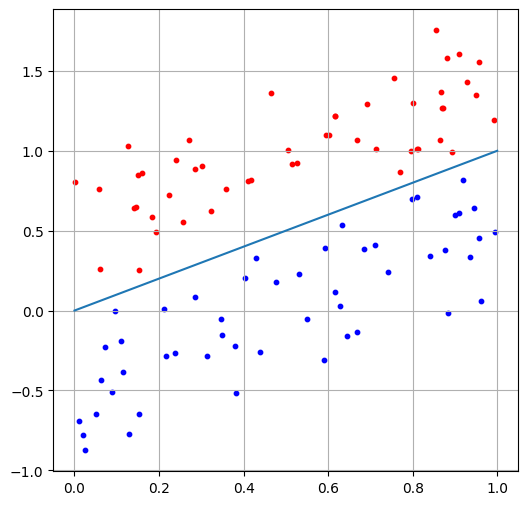

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(C1[:, 0], C1[:, 1], s=10, c='red')
plt.scatter(C2[:, 0], C2[:, 1], s=10, c='blue')
plt.plot(f)
plt.grid()
plt.show()

bias

In [21]:
b = 3

In [22]:
x1 = torch.rand(N)
x2 = x1 + torch.randint(1, 10, [N]) / 10 + b
C1 = torch.vstack([x1, x2, torch.ones(N)]).mT

x1 = torch.rand(N)
x2 = x1 - torch.randint(1, 10, [N]) / 10 + b
C2 = torch.vstack([x1, x2, torch.ones(N)]).mT

f = [0+b, 1+b]
w1 = -0.5
w2 = -w1

w3 = -b * w2

w = torch.FloatTensor([w1,w2,w3])

In [23]:
C = C1

for i in range(N):
  x = C[:][i]
  y = torch.dot(w,x)
  if i%5==0:
    if y>=0:
      print('Class №1')
    else:
      print('Class №2')

Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1
Class №1


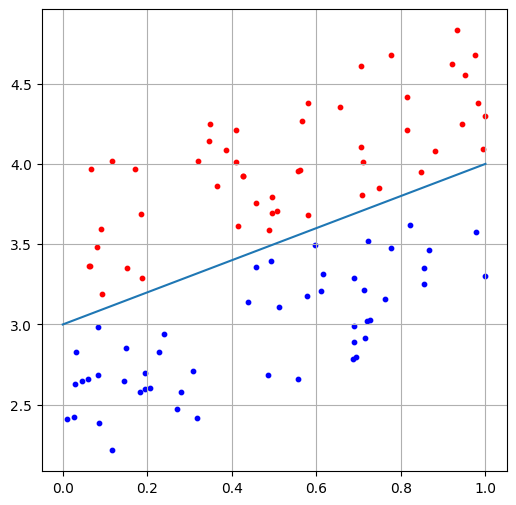

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(C1[:, 0], C1[:, 1], s=10, c='red')
plt.scatter(C2[:, 0], C2[:, 1], s=10, c='blue')
plt.plot(f)
plt.grid()
plt.show()

## XOR

In [25]:
def act(x):
  return 0 if x <= 0 else 1

In [26]:
#C1 = 0,1 or 1,0
#C2 = 1,1 or 0,0
data = [0,0]
b = 1
x = torch.FloatTensor(data + [b])

W_hidden = torch.FloatTensor([
    [1, 1, -1.5],
    [1, 1, -0.5]
])
W_out = torch.FloatTensor([-1, 1, -0.5])

In [27]:
def model(x):
  out_hidden_1 = torch.matmul(W_hidden, x)
  print(out_hidden_1)
  out_Fhidden_1 = torch.FloatTensor([act(x) for x in out_hidden_1] + [1])
  print(out_Fhidden_1)

  out_hidden_2 = torch.dot(W_out, out_Fhidden_1)
  print(out_hidden_2)

  y = act(out_hidden_2)
  print(y)

In [28]:
model(x)

tensor([-1.5000, -0.5000])
tensor([0., 0., 1.])
tensor(-0.5000)
0
